In [1]:
import random
import numpy as np

CHROMOSOME_SIZE = (50, 54)
POPULATION_SIZE = 50

ROOM_SIZE = (20, 40)

NUM_PLAYS = 5

NUM_GENERATIONS = 200

population = [np.random.randint(2, size=CHROMOSOME_SIZE) for _ in range(POPULATION_SIZE)]

def calculate_fitness(chromosome):
    efficiency = 0
    for _ in range(NUM_PLAYS):
        efficiency += random.random()
    return efficiency / NUM_PLAYS

for generation in range(NUM_GENERATIONS):
    fitness = [calculate_fitness(chromosome) for chromosome in population]
    
    num_parents = int(0.2 * POPULATION_SIZE)
    parents = [population[i] for i in np.argsort(fitness)[-num_parents:]]
    
    children = []
    while len(children) < POPULATION_SIZE - num_parents:
        parent1, parent2 = random.choices(parents, k=2)
        
        crossover_point = random.randint(0, CHROMOSOME_SIZE[0] - 1)
        child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]], axis=0)
        
        mutation_rate = 0.01
        for i in range(CHROMOSOME_SIZE[0]):
            if random.random() < mutation_rate:
                child[i] = 1 - child[i]
        
        children.append(child)
    
    population = parents + children

    print(f"Generation {generation + 1}: {max(fitness)}")


Generation 1: 0.7287762612188723
Generation 2: 0.7588731305374514
Generation 3: 0.730614463154554
Generation 4: 0.7743836982607222
Generation 5: 0.7121781675579223
Generation 6: 0.8437901386189679
Generation 7: 0.7086407980608949
Generation 8: 0.7983814325069712
Generation 9: 0.8766652691546785
Generation 10: 0.8519501648962107
Generation 11: 0.7246314590750471
Generation 12: 0.8211112942450158
Generation 13: 0.7347894513310486
Generation 14: 0.8521340603365701
Generation 15: 0.8415141526052843
Generation 16: 0.7630284337195488
Generation 17: 0.7151116039052161
Generation 18: 0.7583042200552884
Generation 19: 0.8147224490929194
Generation 20: 0.8104169537868119
Generation 21: 0.844960255905737
Generation 22: 0.8383456370087725
Generation 23: 0.732895378999618
Generation 24: 0.7614577211330105
Generation 25: 0.7616761181782832
Generation 26: 0.7040256982380797
Generation 27: 0.7894615491532088
Generation 28: 0.7547103090559274
Generation 29: 0.6879715926725745
Generation 30: 0.744286413

In [2]:
import numpy as np

population_size = 50
chromosome_length = 54
population = np.random.randint(2, size=(population_size, chromosome_length))

room_size = (20, 40)
room = np.zeros(room_size)

def fitness(chromosome):
    efficiency = 0
    for i in range(10):
        efficiency += 1
    return efficiency / 10

num_generations = 200
mutation_rate = 0.01
elite_size = 5

for generation in range(num_generations):
    fitness_scores = np.zeros(population_size)
    for i in range(population_size):
        fitness_scores[i] = fitness(population[i])
    
    elite_indices = np.argsort(fitness_scores)[-elite_size:]
    elite_population = population[elite_indices]
    
    new_population = np.zeros((population_size, chromosome_length))
    new_population[:elite_size, :] = elite_population
    for i in range(elite_size, population_size):
        parent1 = elite_population[np.random.randint(elite_size)]
        parent2 = elite_population[np.random.randint(elite_size)]
        crossover_point = np.random.randint(chromosome_length)
        new_population[i, :crossover_point] = parent1[:crossover_point]
        new_population[i, crossover_point:] = parent2[crossover_point:]
        
        for j in range(chromosome_length):
            if np.random.rand() < mutation_rate:
                new_population[i, j] = 1 - new_population[i, j]
    
    population = new_population

best_chromosome = population[np.argmax(fitness_scores)]
best_fitness = fitness(best_chromosome)
print("Best chromosome:", best_chromosome)
print("Fitness score:", best_fitness)

Best chromosome: [1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1.]
Fitness score: 1.0


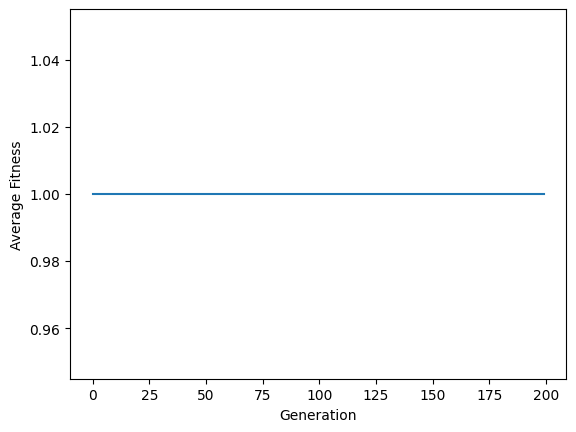

In [3]:
average_fitness = []
for generation in range(num_generations):
    fitness_scores = np.zeros(population_size)
    for i in range(population_size):
        fitness_scores[i] = fitness(population[i])
    avg_fitness = np.mean(fitness_scores)
    average_fitness.append(avg_fitness)
import matplotlib.pyplot as plt
plt.plot(range(num_generations), average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()